# Black Friday Dataset EDA and Feature Engineering
# Cleaning and preparing the data for model training

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
df_train = pd.read_csv(r"C:\Users\areeb\Downloads\DataSets\Black Friday\train.csv")

df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# test data 

df_test = pd.read_csv(r"C:\Users\areeb\Downloads\DataSets\Black Friday\test.csv")

df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
## marge both dataset

df = pd.concat([df_train,df_test], ignore_index = True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
df.drop(columns = ["User_ID"], axis = 1 , inplace = True)

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
pd.get_dummies(df["Gender"])

,F,M
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
783662,True,False
783663,True,False
783664,True,False
783665,True,False


In [11]:
df["Gender"] = df["Gender"].map({"M":0,"F":1})

In [12]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,1,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,1,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,1,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,1,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [13]:
# handle categorial feature Age

df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
df["Age"] = df["Age"].map({'0-17':1, '18-25':2 , '26-35':3 , '36-45':4 , '46-50':5 , '51-55': 6 ,'55+': 7 })

In [15]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['Age']= label_encoder.fit_transform(df['Age']) 

df['Age'].unique() 


array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [16]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,6,16,C,4+,0,8,NaN,NaN,7969.0


In [17]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [18]:
df_city = pd.get_dummies(df["City_Category"], drop_first = True)

df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [19]:
df = pd.concat([df,df_city], axis = 1)

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,1,0,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,1,0,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,1,0,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,0,6,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [20]:
df.drop(columns = "City_Category" , axis = 1 , inplace = True)

In [21]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,1,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,1,0,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,1,0,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,0,6,16,4+,0,8,NaN,NaN,7969.0,False,True


In [22]:
# Missing Values

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [23]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [24]:
df["Product_Category_2"].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [25]:
# replace missing vale with mode
df["Product_Category_2"] = df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [26]:
df["Product_Category_2"].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [27]:
df["Product_Category_3"] = df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [28]:
df["Product_Category_3"].unique()

array([16., 14., 17.,  5.,  4., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

In [29]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [30]:
df.shape

(783667, 12)

In [31]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [32]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace("+", "")

In [33]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(5), object(2)
memory usage: 61.3+ MB


In [35]:
# convert obj into integers

df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)

In [36]:
df["B"] = df["B"].astype(int)

In [37]:
df["C"] = df["C"].astype(int)

In [38]:
df["Age"] = pd.to_numeric(df["Age"], errors = "coerce")

In [59]:
df['Gender'] = df['Gender'].astype(int)

In [63]:
df.drop(columns = "Product_ID" , axis = 1 , inplace = True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int32  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int32  
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   B                           550068 non-null  int32  
 9   C                           550068 non-null  int32  
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int32(4), int64(4)
memory usage: 42.0 MB


<Axes: xlabel='Age', ylabel='Purchase'>

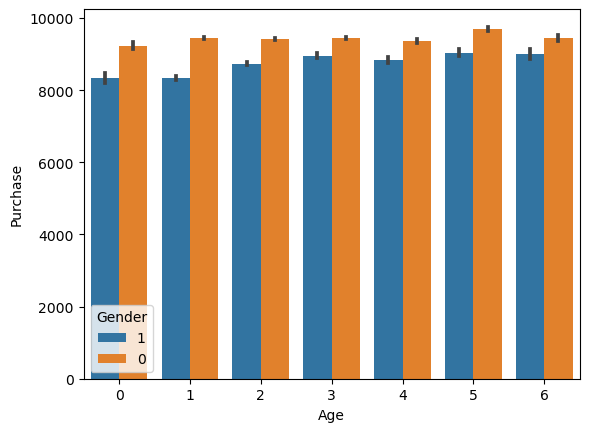

In [41]:
# Visulization

sns.barplot( x = "Age", y = "Purchase", hue = "Gender", data = df )



# purchasing of men is higher than men

<Axes: xlabel='Occupation', ylabel='Purchase'>

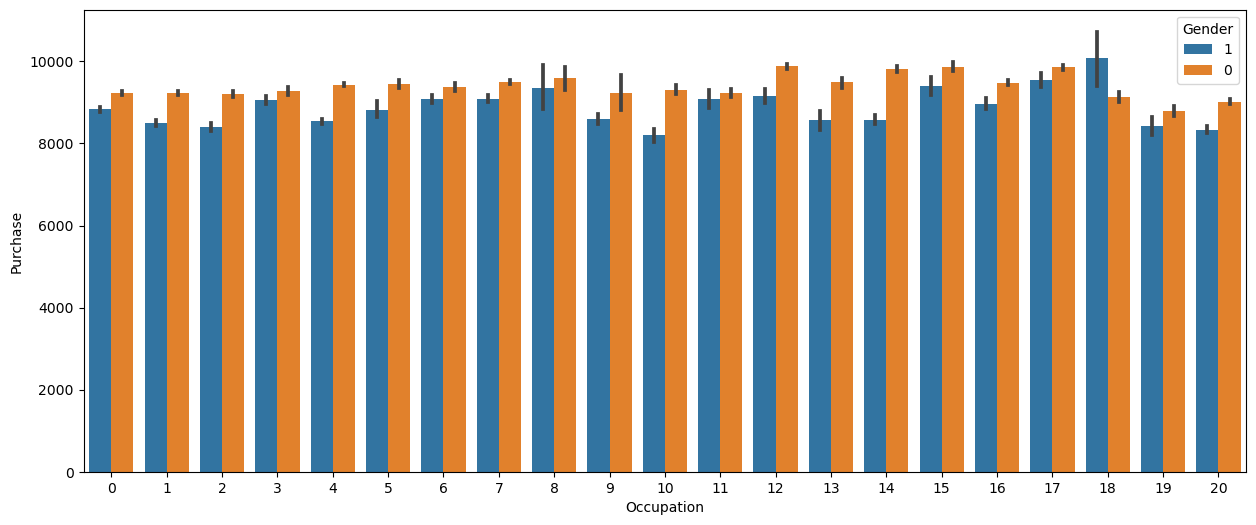

In [42]:
plt.figure(figsize = (15,6))

sns.barplot( x = "Occupation", y = "Purchase", hue = "Gender", data = df)

Text(0.5, 1.0, 'Product_Category_1')

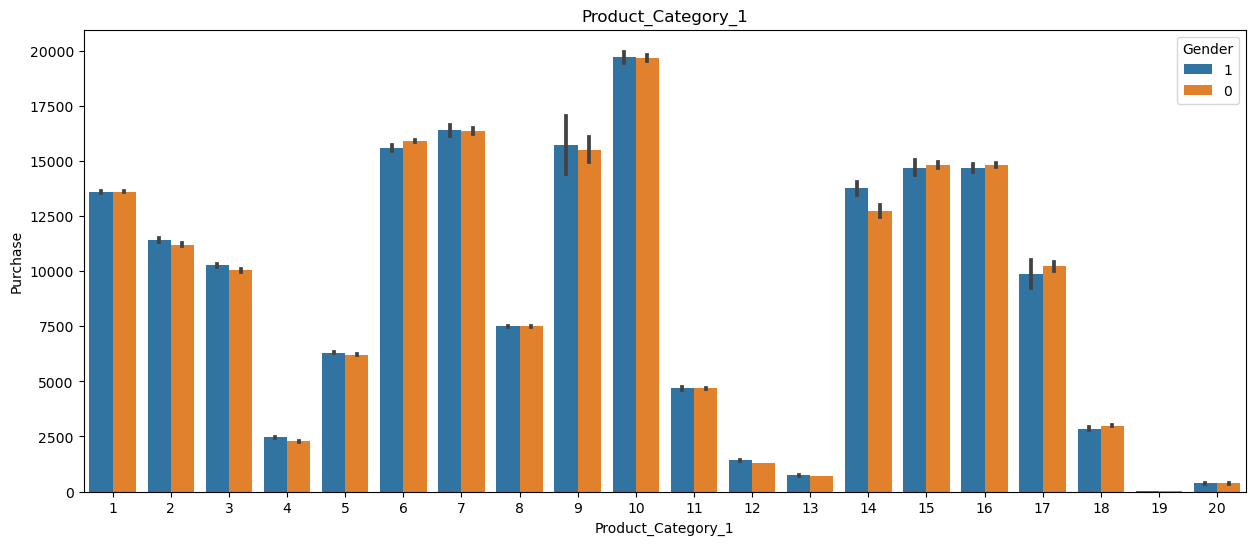

In [43]:
plt.figure(figsize = (15,6))

sns.barplot(x = "Product_Category_1", y = "Purchase", hue = "Gender", data = df)

plt.title("Product_Category_1")

Text(0.5, 1.0, 'Product_Category_2')

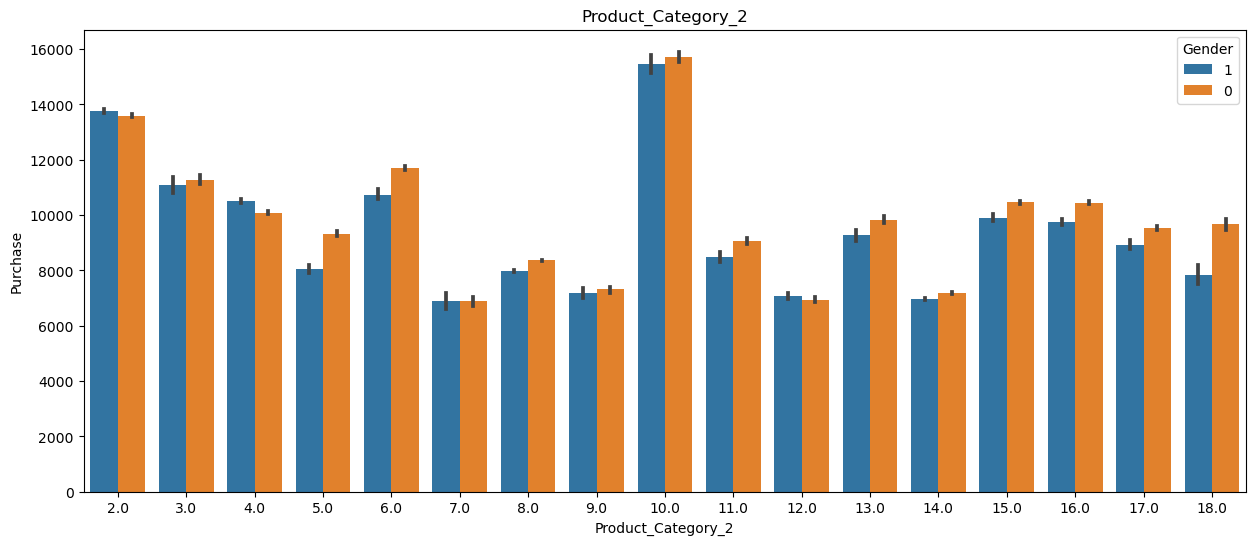

In [44]:
plt.figure(figsize = (15,6))

sns.barplot(x = "Product_Category_2", y = "Purchase", hue = "Gender", data = df)

plt.title("Product_Category_2")

Text(0.5, 1.0, 'Product_Category_3')

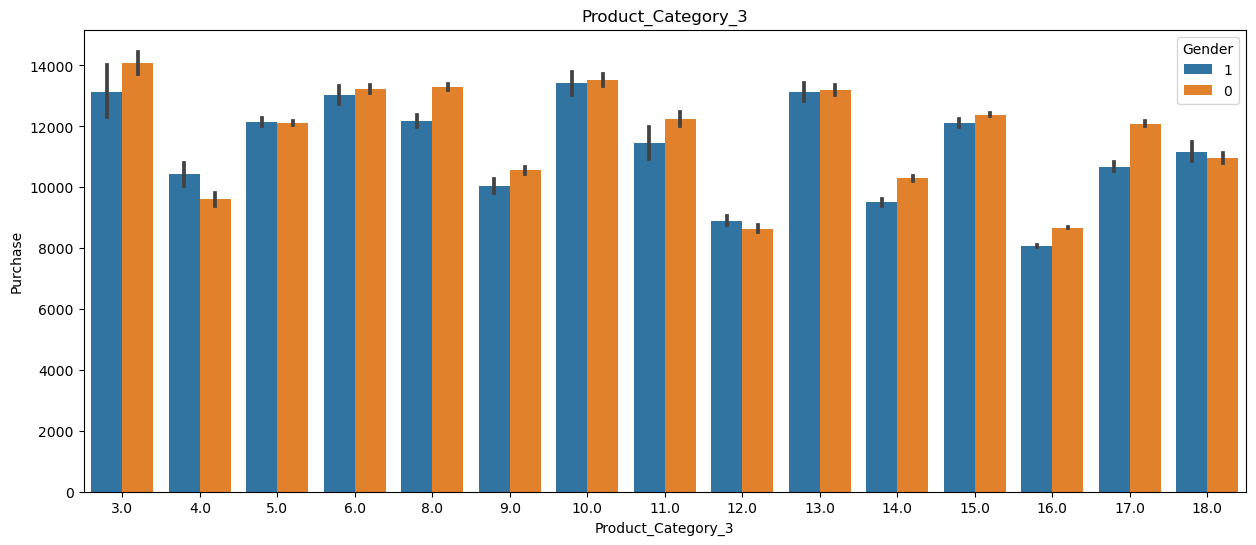

In [45]:
plt.figure(figsize = (15,6))

sns.barplot(x = "Product_Category_3", y = "Purchase", hue = "Gender", data = df)

plt.title("Product_Category_3")